# **Phases 1 and 2 Revisited**

## *Prompt*

**Microsoft's Making Moves into Movies**

>* What types of movies are performing the best a the box offices?
>* What actions should they take based on the data?

## *Questions*

**What questions will guide my process?**

>* What release times are best for gross value?
>* Which directors show the strongest/weakest performance?
>* What features would give the strongest indications of performance?
>* How can we determine whether or not a movie is "successful" or not?

**What preconceived ideas do I have about the data? What guesses can I make now?**

>* 
>* 

## *Process*

>1. Import .csv's
>2. Clean data
>3. EDA w. visuals
>4. **Determine initial insights and actions**
>5. Create new features
>6. Test for correlations/multicollinearity
>7. Perform statistical testing
>8. Create LinReg model for **inference**
>9. Create LinReg model for **predictions**
>10. **Present final results for inferences, predictions**
    1. Include initial, final insights and recommendations

# **Imports**

## Packages

In [1]:
## Accessing stored data
import csv
import os,glob

## Data exploration and statistics
import pandas as pd
import numpy as np
from sklearn import preprocessing

## Creating Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

## Settings
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_context('notebook')

## Data

In [2]:
## Creating list of files to loop through for data
data_folder = 'zippedData/'
data_files = glob.glob(f'{data_folder}*.csv*')
data_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [3]:
## Looping through individual data files

## Code adapted from James Irving
## Source: youtube.com/watch?v=rufvTgBEYN8&list=PLFknVelSJiSxSwXifV_ysDg50fzbuTzVt&index=41

clean_file_names = {}
split = '-----'*25

for file in data_files:
    name = file.replace('.csv.gz','').split('\\')[-1].replace('.','_')
    print(split)
    
    print(f"Preview of {name}:")
    clean_file_names[name] = pd.read_csv(file)
    display(clean_file_names[name].head(5))
    print()

-----------------------------------------------------------------------------------------------------------------------------
Preview of bom_movie_gross:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_name_basics:


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_akas:


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.00
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.00
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.00



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_basics:


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_crew:


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_principals:


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_ratings:


,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21



-----------------------------------------------------------------------------------------------------------------------------
Preview of tmdb_movies:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186



-----------------------------------------------------------------------------------------------------------------------------
Preview of tn_movie_budgets:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# **Functions****

In [4]:
## Not working - unknown error

## Data Type Conversion

# def split_str(df, list_col, change, result):
#     '''Splits strings in a list of columns based on what value to change 
#     and the desired result.
    
#     Args:
#         * dataframe source
#         * list of selected columns
#         * charater to change from (str)
#         * charater to change to (str)'''
    
    
#     for i in list_col:
#         try:
#             df[i] = df[i].map((lambda x: int(x.replace(change,result))))

#         except Exception:
#             print('---'*25)
#             print(f'Already converted {df[i]}')
#             print()

# #         display(df[i])

#         return df

# **Data Cleaning**

## Slicing desired DataFrames from Dictionary for Exploration

In [5]:
## Selecting for genre details
title_basics = clean_file_names['imdb_title_basics']
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


In [6]:
## Selecting for budget and gross details
movie_basics = clean_file_names['tn_movie_budgets']
movie_basics

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
## Selecting for gross details
movie_gross = clean_file_names['bom_movie_gross']
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


## Merging Dataframes

In [8]:
## Merging title_basics and movie_basics on primary title

merged_basics_primary = pd.merge(title_basics,movie_basics, 
                                 left_on= 'primary_title', right_on= 'movie')
merged_basics_primary

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,nan,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.00,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,nan,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,nan,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [9]:
# ## Deprecated - focused on larger data set - Merging title_basics and movie_basics on original title

# merged_basics_original = pd.merge(title_basics,movie_basics, 
#                                   left_on= 'original_title', right_on= 'movie')
# merged_basics_original

In [10]:
df = merged_basics_primary.copy()

## Removing Redundant "Movie" Column

In [11]:
## Verifying all titles/movies match
# df[df.loc[:,'primary_title'] != df.loc[:,'movie']]

In [12]:
## Verifying all titles/movies match - np.where faster than logical slicing 
for x in np.where((df.loc[:,'primary_title'] != df.loc[:,'movie']),1,0):
    if x == 1:
        print(x)

In [13]:
## Dropping redundant "movie" column -  incl t/e to be able to rerun notebook

for col in df.columns:
    try:
        df.drop('movie', axis=1, inplace=True)
    except:
        pass
    
## Confirming removal
'movie' in df.columns

False

## Converting Currencies from Str to Int

In [14]:
## Converting gross amounts from strings to integers and removing 

dollar_to_int = ['production_budget','worldwide_gross','domestic_gross']

for i in dollar_to_int:
    try:
        df[i] = df[i].map((lambda x: int(x.replace('$','').replace(',',''))))

    except Exception:
        print('---'*25)
        print('Already converted.')
        print()
        
    display(df[i][:3])

0    45000000
1    20000000
2      200000
Name: production_budget, dtype: int64

0        73706
1    122133227
2      1165996
Name: worldwide_gross, dtype: int64

0           0
1    70433227
2     1109808
Name: domestic_gross, dtype: int64

## Filling Null Values with "Missing"

In [15]:
## Filling null values with "missing" to allow further processing

df_filled = df.fillna('Missing').copy()
display(df.isna().sum())
display(df_filled.isna().sum())

tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      487
genres                72
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## ***Creating Seasons***

### Datetime Approach

In [16]:
## Changing release date to datetime datatype

df_filled['release_datetime'] = pd.to_datetime(df_filled['release_date'])
df_filled['release_datetime']

0      2012-12-31
1      1995-08-18
2      2015-06-19
3      2015-06-19
4      2013-03-22
          ...    
3810   2008-11-14
3811   1982-04-02
3812   2008-08-27
3813   2004-10-29
3814   2007-03-13
Name: release_datetime, Length: 3815, dtype: datetime64[ns]

In [17]:
## Using datetime dtype to create months column
df_filled['release_month_dt'] = df_filled['release_datetime'].dt.month_name()
df_filled['release_month_dt']

0       December
1         August
2           June
3           June
4          March
          ...   
3810    November
3811       April
3812      August
3813     October
3814       March
Name: release_month_dt, Length: 3815, dtype: object

In [18]:
df_filled['release_quarter'] = df_filled['release_datetime'].dt.quarter
df_filled['release_quarter']

0       4
1       3
2       2
3       2
4       1
       ..
3810    4
3811    2
3812    3
3813    4
3814    1
Name: release_quarter, Length: 3815, dtype: int64

### Manual approach

In [19]:
## Inspecting original values
df_filled['release_date'][:5]

0    Dec 31, 2012
1    Aug 18, 1995
2    Jun 19, 2015
3    Jun 19, 2015
4    Mar 22, 2013
Name: release_date, dtype: object

In [20]:
## Pulling month
test_month = df_filled['release_date'][0][:3]
test_month

'Dec'

In [21]:
## Creating new column for the month of each release date
release_month = []

for movie in df_filled['release_date']:
    release_month.append(movie[:3])
    
df_filled['release_month_manual'] = release_month

In [22]:
## Using map and lambda functions to slice out month from string
df_filled['release_month_manual'] = df_filled['release_date'].map(lambda x: x[:3])
df_filled['release_month_manual']

0       Dec
1       Aug
2       Jun
3       Jun
4       Mar
       ... 
3810    Nov
3811    Apr
3812    Aug
3813    Oct
3814    Mar
Name: release_month_manual, Length: 3815, dtype: object

In [23]:
df_filled.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'id', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_datetime',
       'release_month_dt', 'release_quarter', 'release_month_manual'],
      dtype='object')

In [24]:
season = []

for month in df_filled['release_month_manual']:
    if month == 'Jan':
        season.append('Winter')
    elif month == 'Feb':
        season.append('Winter')
    elif month == 'Mar':
        season.append('Spring')
    elif month == 'Apr':
        season.append('Spring')
    elif month == 'May':
        season.append('Spring')
    elif month == 'Jun':
        season.append('Summer')
    elif month == 'Jul':
        season.append('Summer')
    elif month == 'Aug':
        season.append('Summer')
    elif month == 'Sep':
        season.append('Fall')
    elif month == 'Oct':
        season.append('Fall')
    elif month == 'Nov':
        season.append('Fall')
    elif month == 'Dec':
        season.append('Winter')
    else:
        print('na')


In [25]:
df_filled['release_season_manual'] = season
df_filled['release_season_manual']

0       Winter
1       Summer
2       Summer
3       Summer
4       Spring
         ...  
3810      Fall
3811    Spring
3812    Summer
3813      Fall
3814    Spring
Name: release_season_manual, Length: 3815, dtype: object

### Review

In [26]:
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month_dt,release_quarter,release_month_manual,release_season_manual
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,August,3,Aug,Summer
2,tt0326592,The Overnight,The Overnight,2010,88.00,Missing,21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,June,2,Jun,Summer
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,June,2,Jun,Summer
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,2013-03-22,March,1,Mar,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Missing,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,2008-11-14,November,4,Nov,Fall
3811,tt9729206,Diner,Diner,2019,Missing,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,1982-04-02,April,2,Apr,Spring
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,August,3,Aug,Summer
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,October,4,Oct,Fall


## Splitting Genres into Lists

In [27]:
## Via map & lambda
df_filled['genres_list'] = df_filled['genres'].map(lambda x: x.split(','))
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month_dt,release_quarter,release_month_manual,release_season_manual,genres_list
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter,"[Action, Animation, Comedy]"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,August,3,Aug,Summer,"[Action, Adventure, Fantasy]"
2,tt0326592,The Overnight,The Overnight,2010,88.00,Missing,21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,June,2,Jun,Summer,[Missing]
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,June,2,Jun,Summer,"[Comedy, Mystery]"
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,2013-03-22,March,1,Mar,Spring,"[Adventure, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Missing,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,2008-11-14,November,4,Nov,Fall,"[Documentary, Sport]"
3811,tt9729206,Diner,Diner,2019,Missing,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,1982-04-02,April,2,Apr,Spring,[Crime]
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,August,3,Aug,Summer,"[Action, Drama, Romance]"
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,October,4,Oct,Fall,[Crime]


In [28]:
## Via .str and string methods
df_filled['genres_str'] = df_filled['genres'].str.lower().str.split(',')
df_filled['genres_str']

0        [action, animation, comedy]
1       [action, adventure, fantasy]
2                          [missing]
3                  [comedy, mystery]
4        [adventure, drama, romance]
                    ...             
3810            [documentary, sport]
3811                         [crime]
3812        [action, drama, romance]
3813                         [crime]
3814                   [documentary]
Name: genres_str, Length: 3815, dtype: object

# **Visualizations**

In [36]:
## Creating new rows for each genre per movie
plot_df = df_filled.explode('genres_list')
plot_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month_dt,release_quarter,release_month_manual,release_season_manual,genres_list,genres_str
0,tt3530002,The Night Before,The Night Before,2015,101.00,"Adventure,Comedy,Fantasy",6,"Nov 20, 2015",25000000,43035725,52427346,2015-11-20,November,4,Nov,Fall,Adventure,"[adventure, comedy, fantasy]"
0,tt3530002,The Night Before,The Night Before,2015,101.00,"Adventure,Comedy,Fantasy",6,"Nov 20, 2015",25000000,43035725,52427346,2015-11-20,November,4,Nov,Fall,Comedy,"[adventure, comedy, fantasy]"
0,tt3530002,The Night Before,The Night Before,2015,101.00,"Adventure,Comedy,Fantasy",6,"Nov 20, 2015",25000000,43035725,52427346,2015-11-20,November,4,Nov,Fall,Fantasy,"[adventure, comedy, fantasy]"
1,tt0829150,Dracula Untold,Dracula Untold,2014,92.00,"Action,Drama,Fantasy",21,"Oct 10, 2014",70000000,55991880,220241723,2014-10-10,October,4,Oct,Fall,Action,"[action, drama, fantasy]"
1,tt0829150,Dracula Untold,Dracula Untold,2014,92.00,"Action,Drama,Fantasy",21,"Oct 10, 2014",70000000,55991880,220241723,2014-10-10,October,4,Oct,Fall,Drama,"[action, drama, fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,tt1068242,Footloose,Footloose,2011,113.00,"Comedy,Drama,Music",61,"Feb 17, 1984",8200000,80000000,80000000,1984-02-17,February,1,Feb,Winter,Drama,"[comedy, drama, music]"
3813,tt1068242,Footloose,Footloose,2011,113.00,"Comedy,Drama,Music",61,"Feb 17, 1984",8200000,80000000,80000000,1984-02-17,February,1,Feb,Winter,Music,"[comedy, drama, music]"
3814,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter,Action,"[action, animation, comedy]"
3814,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,December,4,Dec,Winter,Animation,"[action, animation, comedy]"


## Worldwide Gross per Genre

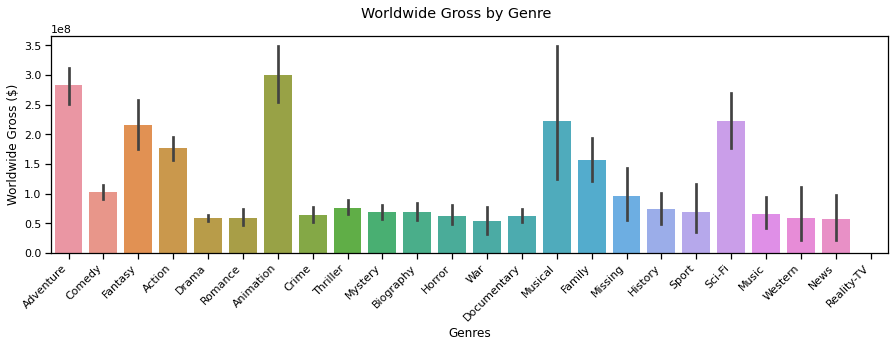

In [37]:
## Visualizing results

plt.figure(figsize=(15,4))
sns.barplot(data=plot_df, x= 'genres_list', y='worldwide_gross')
plt.xticks(rotation=45, ha= 'right')
plt.suptitle('Worldwide Gross by Genre')
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross ($)');

**Observations:**
>* **Top three genres:** Animation, Adventure, and Sci-Fi
>* **Lowest three genres:** Reality-TV, War and News
>* *Musicals are a high-risk, high-reward option*
    * Their gross can exceed Animation, or fall below the top 5 genres.

**Suggestions**
>* **Safest Genres (by Gross)** are the top three genres
    * Lowest points on the error bars indicate high gross performance even at their worst
>* Select from Action, Animation, Adventure, Fantasy, Sci-Fi, Family, or Musicals
    * All others show poor performance

## Visualizing Seasonality

### Seasonal Performance (All Movies)

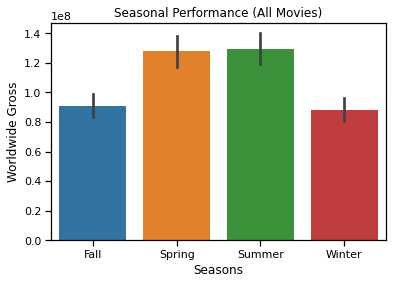

In [41]:
## Creating basic overview
g = sns.barplot(data=plot_df, x='release_season_manual', y='worldwide_gross')
g.set_xlabel('Seasons')
g.set_ylabel('Worldwide Gross')
g.set_title('Seasonal Performance (All Movies)');

**Observations:**
>* Summer is the best season for releases, with winter being the worst time.
>* Summer and Spring seasons seem to be the most productive seasons.
>* Fall and Winter perform worse.

**Suggestions**
>* Focus release times in Summer/Spring
>* Avoid Fall/Winter

### Genre Performance by Season

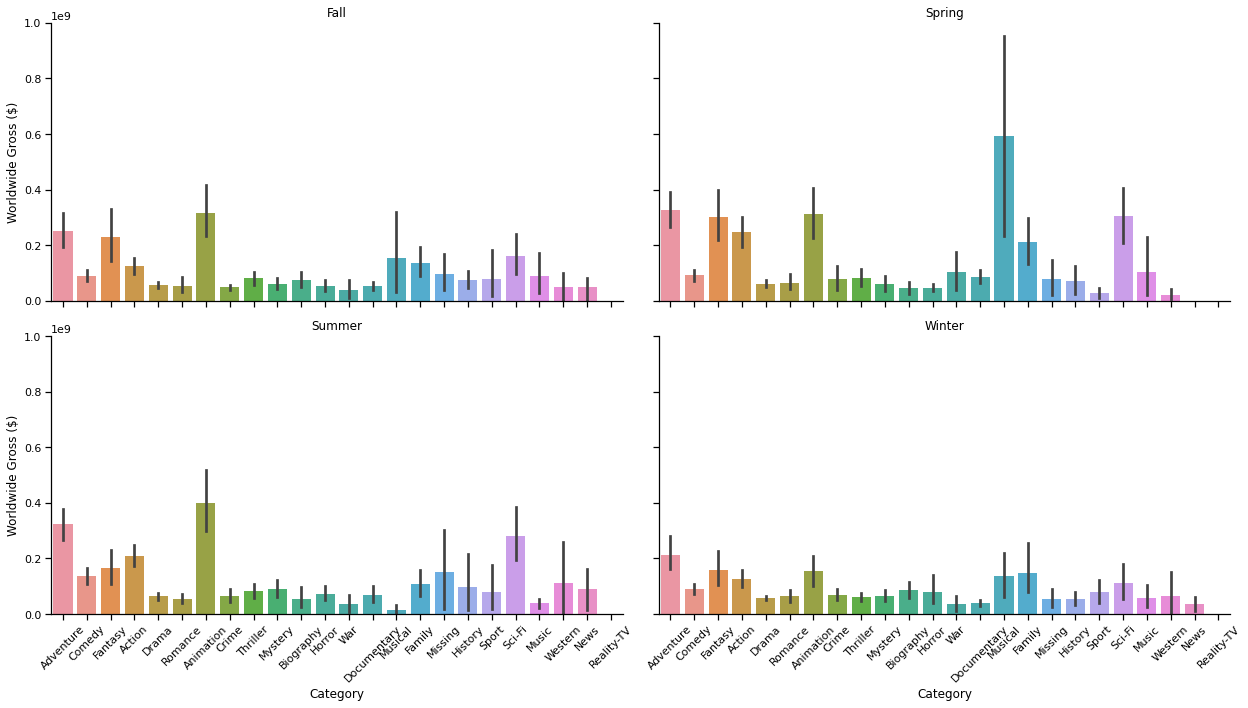

In [39]:
## Visualizing each genre's performance by season
g = sns.catplot(data=plot_df, col='release_season_manual',
            y='worldwide_gross', kind='bar', x='genres_list', col_wrap=2, 
            aspect=1.75)#, sharex=False)
(g.set_axis_labels('Category', 'Worldwide Gross ($)')
 .set_xticklabels(rotation=45)
 .set_titles("{col_name}"))
 
plt.tight_layout();

**Observations:**
>* Springtime releases show highest gross performance on average
>* Wintertime shows lowest performances across all genres
>* The results match up with our overall view for all genres

**Suggestions**
>* To maximize profitability of musicals, release in spring
>* Avoid releasing Animations in the winter - all other seasons perform better
>* Avoid releasing news-related movies in the Spring

## Seasons vs. Quarters

How would the data look when comparing seasons to quarters?

In [40]:
## Sorting by release quarters for graphing
df_filled.sort_values('release_quarter', inplace=True)
df_filled.reset_index(drop=True, inplace=True)
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month_dt,release_quarter,release_month_manual,release_season_manual,genres_list,genres_str
0,tt3215846,Dreamcatcher,Dreamcatcher,2015,104.00,"Crime,Documentary,Drama",59,"Mar 21, 2003",68000000,33685268,75685268,2003-03-21,March,1,Mar,Spring,"[Crime, Documentary, Drama]","[crime, documentary, drama]"
1,tt4650752,Message in a Bottle,Message in a Bottle,2017,Missing,Adventure,91,"Feb 12, 1999",30000000,52880016,52880016,1999-02-12,February,1,Feb,Winter,[Adventure],[adventure]
2,tt4667094,Fifty Shades of Black,Fifty Shades of Black,2016,92.00,Comedy,15,"Jan 29, 2016",5000000,11686940,22113075,2016-01-29,January,1,Jan,Winter,[Comedy],[comedy]
3,tt4701724,Early Man,Early Man,2018,89.00,"Adventure,Animation,Comedy",98,"Feb 16, 2018",50000000,8267544,45285890,2018-02-16,February,1,Feb,Winter,"[Adventure, Animation, Comedy]","[adventure, animation, comedy]"
4,tt6811018,The Kid Who Would Be King,The Kid Who Would Be King,2019,120.00,"Action,Adventure,Family",55,"Jan 25, 2019",59000000,16790790,28348446,2019-01-25,January,1,Jan,Winter,"[Action, Adventure, Family]","[action, adventure, family]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt1686470,Inferno,Giao lo dinh menh,2010,100.00,Thriller,64,"Oct 28, 2016",75000000,34343574,219519367,2016-10-28,October,4,Oct,Fall,[Thriller],[thriller]
3811,tt5473848,Superstar,Superstar,2011,Missing,Comedy,89,"Oct 8, 1999",14000000,30628981,30628981,1999-10-08,October,4,Oct,Fall,[Comedy],[comedy]
3812,tt6413518,The Express,The Express,2017,90.00,"Horror,Thriller",88,"Oct 10, 2008",37500000,9793406,9813309,2008-10-10,October,4,Oct,Fall,"[Horror, Thriller]","[horror, thriller]"
3813,tt2080374,Steve Jobs,Steve Jobs,2015,122.00,"Biography,Drama",60,"Oct 9, 2015",30000000,17766658,35579007,2015-10-09,October,4,Oct,Fall,"[Biography, Drama]","[biography, drama]"


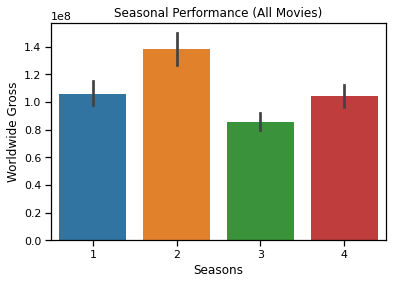

In [42]:
## Creating basic overview
g = sns.barplot(data=plot_df, x='release_quarter', y='worldwide_gross')
g.set_xlabel('Quarter')
g.set_ylabel('Worldwide Gross')
g.set_title('Quarter Performance (All Movies)');

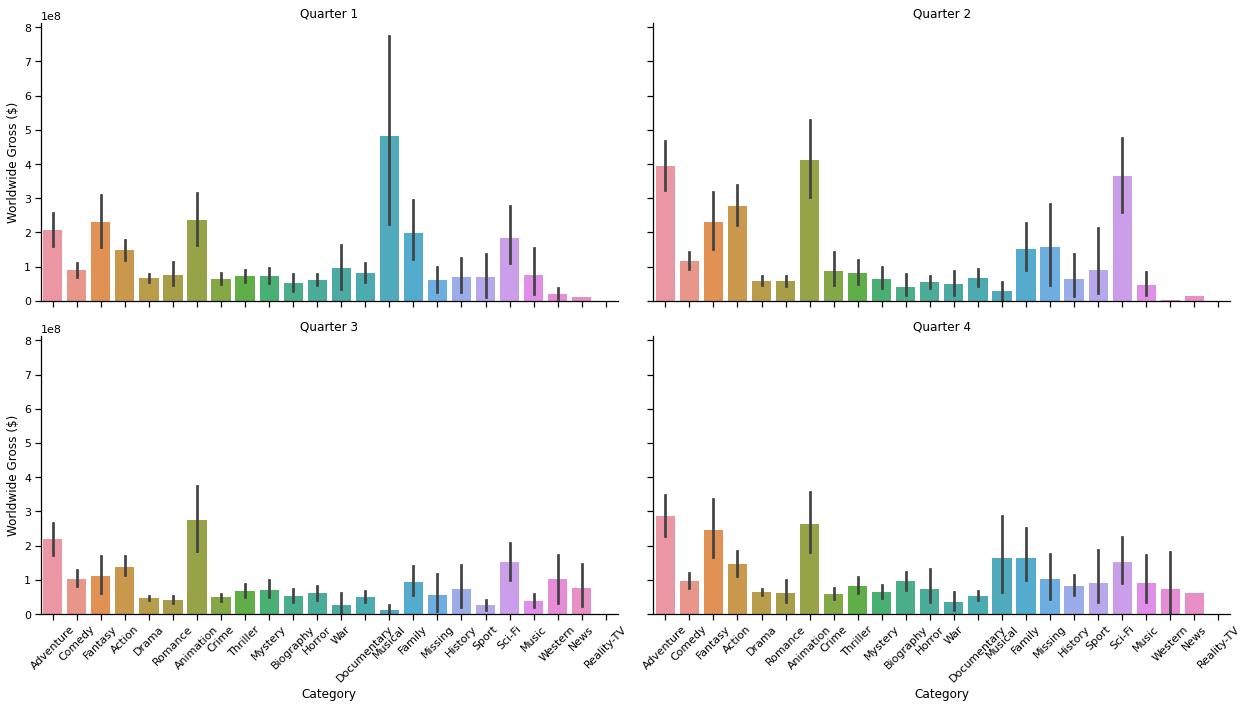

In [44]:
g = sns.catplot(data=plot_df, col='release_quarter',
            y='worldwide_gross', kind='bar', x='genres_list', col_wrap=2, 
            aspect=1.75)#, sharex=False)
(g.set_axis_labels('Category', 'Worldwide Gross ($)')
 .set_xticklabels(rotation=45)
 .set_titles("Quarter {col_name}"))
 
plt.tight_layout();

## **Seasonality -  Insights**

**Observations:**
>
>The top five genres tend to perform relatively well regardless of the season with little difference between each season.
>
> Musicals show a strongest performance in the springtime - it is only worthwhile to release a musical in the spring.
>
**Questions**
> 
>What is the profitability and return on investment for each genre?

# Correlations/Multicollinearity

# Statistical Testing

# Inferential Modeling

# Predictive Modeling

# Final Results